# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv('sinasc_RO_2019.csv')

df.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [11]:

#utilizei o .cut ao invez de varios ifs e elses que nem em uma tarefa anterior
#como as categorias de APGAR5 são intervalos achei melhor assim, nao sei se é 
#o melhor método

df['APGAR5_categoria'] = pd.cut(df['APGAR5'], bins = [0, 3, 5, 7, 10], labels = ['asfixia grave', 'asfixia moderada', 'asfixia leve', 'normal'], right = True)

df.head()


,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,APGAR5_categoria
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273,normal
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

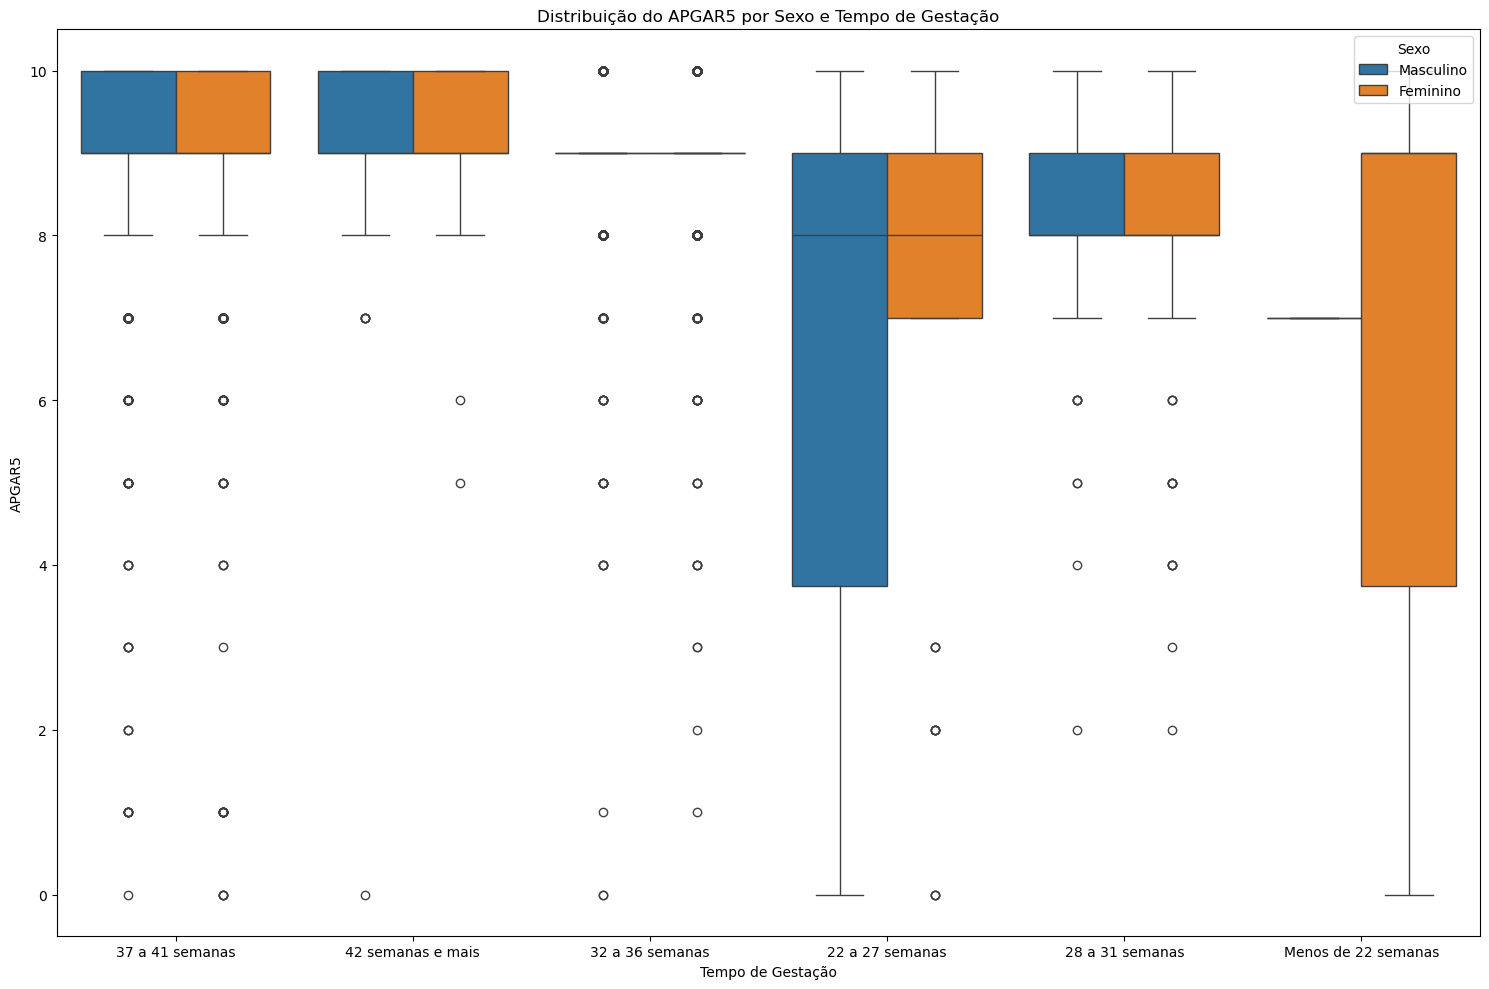

In [17]:
plt.figure(figsize = (15, 10))
sns.boxplot(x = 'GESTACAO', y = 'APGAR5', hue = 'SEXO', data=df)
plt.title('Distribuição do APGAR5 por Sexo e Tempo de Gestação')
plt.xlabel('Tempo de Gestação')
plt.ylabel('APGAR5')
plt.legend(title = 'Sexo', loc = 'upper right')
plt.tight_layout()

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [19]:
tabela_cruzada = pd.crosstab(df['GESTACAO'], df['APGAR5'])

tabela_cruzada

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,7,0,8,6,1,0,2,10,24,19,8
28 a 31 semanas,0,0,2,1,5,7,7,11,61,55,13
32 a 36 semanas,2,2,2,2,8,11,17,56,362,1307,465
37 a 41 semanas,5,20,3,5,7,21,45,151,1417,13565,7284
42 semanas e mais,1,0,0,0,0,1,1,5,44,423,223
Menos de 22 semanas,1,0,1,0,0,0,0,1,0,3,1


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [23]:
tabela_cruzada_percentuais = pd.crosstab(df['GESTACAO'], df['APGAR5'], normalize = 'index') * 100
tabela_cruzada_percentuais

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,8.235294,0.000000,9.411765,7.058824,1.176471,0.000000,2.352941,11.764706,28.235294,22.352941,9.411765
28 a 31 semanas,0.000000,0.000000,1.234568,0.617284,3.086420,4.320988,4.320988,6.790123,37.654321,33.950617,8.024691
32 a 36 semanas,0.089526,0.089526,0.089526,0.089526,0.358102,0.492390,0.760967,2.506714,16.204118,58.504924,20.814682
37 a 41 semanas,0.022200,0.088798,0.013320,0.022200,0.031079,0.093238,0.199796,0.670426,6.291347,60.227323,32.340274
42 semanas e mais,0.143266,0.000000,0.000000,0.000000,0.000000,0.143266,0.143266,0.716332,6.303725,60.601719,31.948424
Menos de 22 semanas,14.285714,0.000000,14.285714,0.000000,0.000000,0.000000,0.000000,14.285714,0.000000,42.857143,14.285714


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

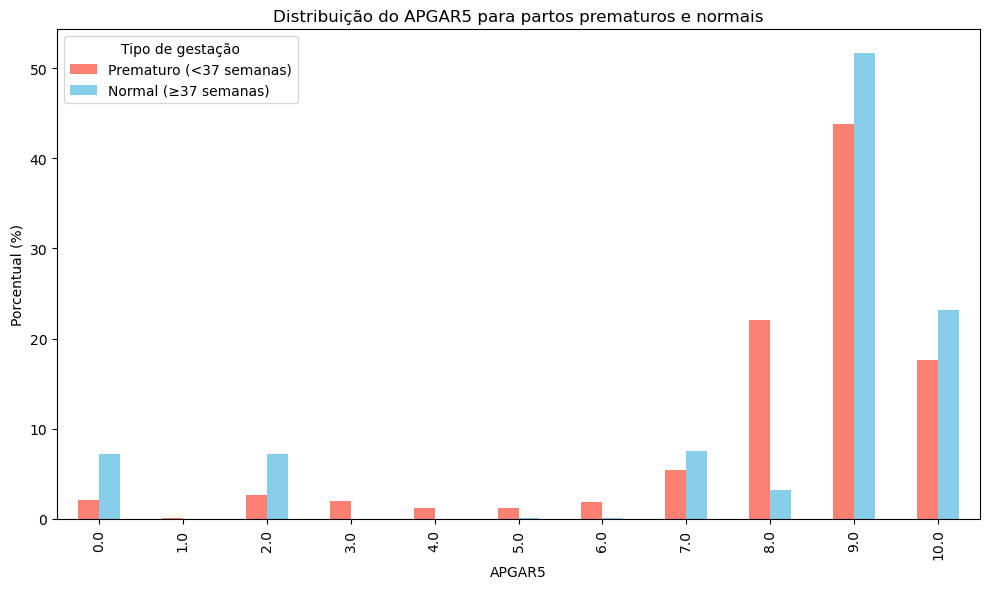

In [42]:
prematuro = tabela_cruzada_percentuais.loc[tabela_cruzada_percentuais.index < '37 semanas'].mean()
normal = tabela_cruzada_percentuais.loc[tabela_cruzada_percentuais.index >= '37 semanas'].mean()

comparando = pd.DataFrame({'Prematuro (<37 semanas)': prematuro, 'Normal (≥37 semanas)': normal})

comparando.plot(kind = 'bar', figsize = (10, 6), color = ['salmon', 'skyblue'])
plt.title('Distribuição do APGAR5 para partos prematuros e normais')
plt.xlabel('APGAR5')
plt.ylabel('Porcentual (%)')
plt.legend(title='Tipo de gestação')
plt.tight_layout()

#achei melhor fazer a comparação por uma tabela com os dois porcentuais de parto normal e prematuro
#mas nao sei se fiz o gráfico corretamente ou se a maneira que realizei a comparação fez sentido

Os partos prematuros possuem uma porcentagem um pouco maior nas faixas de APGAR5 baixas (menores que 7), assim como uma porcentagem menor
nas faixas de APGAR5 altos (maiores que 7), o que sugere que bebes que vieram de um parto não prematuro possam ter uma condição de saude melhor
o que corrorobora a afirmação dos médicos.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

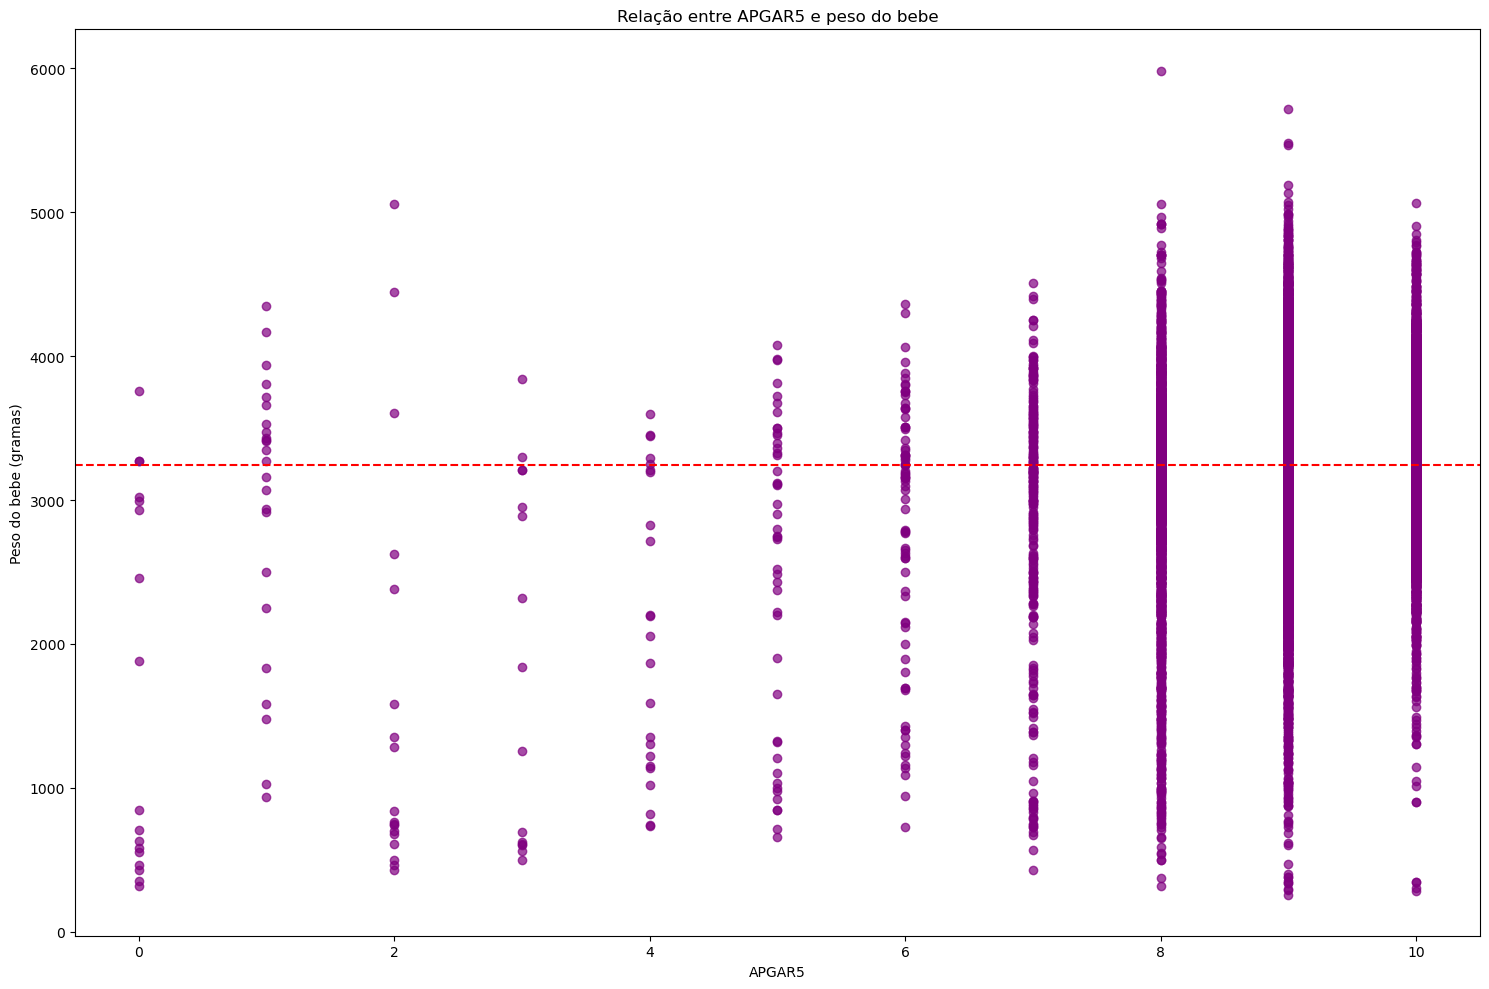

In [52]:
#neste exercicio vou usar um gráfico de disperção e um boxplot
plt.figure(figsize = (15, 10))
plt.scatter(df['APGAR5'], df['PESO'], alpha = 0.7, color='purple') #deixei 0.7 para deixar um pouco transparente
plt.title('Relação entre APGAR5 e peso do bebe')
plt.xlabel('APGAR5')
plt.ylabel('Peso do bebe (gramas)')

plt.tight_layout()


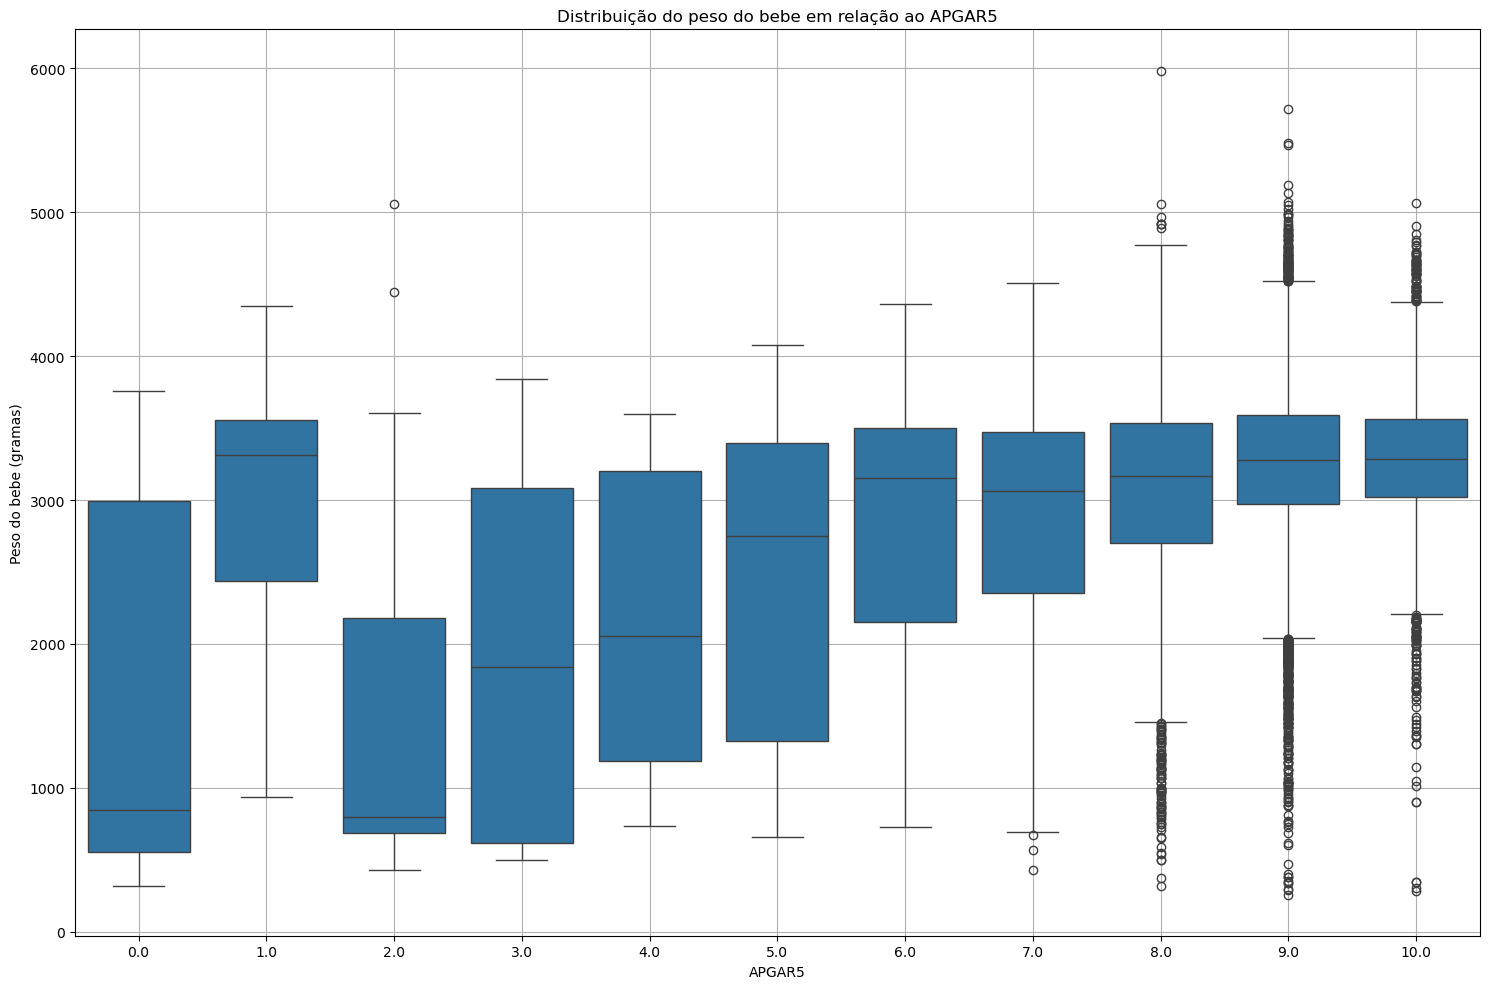

In [56]:
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'APGAR5', y = 'PESO', data = df)
plt.title('Distribuição do peso do bebe em relação ao APGAR5')
plt.xlabel('APGAR5')
plt.ylabel('Peso do bebe (gramas)')
plt.grid()
plt.tight_layout()

Existe uma relação, a qual bebês com APGAR5 mais alto (8-10) tendem a ter uma distribuição de peso mais concentrada na faixa normal enquanto que para valores de APGAR5 mais baixos (0-4) os bebes apresentam maior variabilidade no peso e mais casos de baixo peso.